

Lecture de la base  de donnees



Lecture de la base  de donnees

proportion de varaible explique par chaque composante [0.64834629 0.22681254]


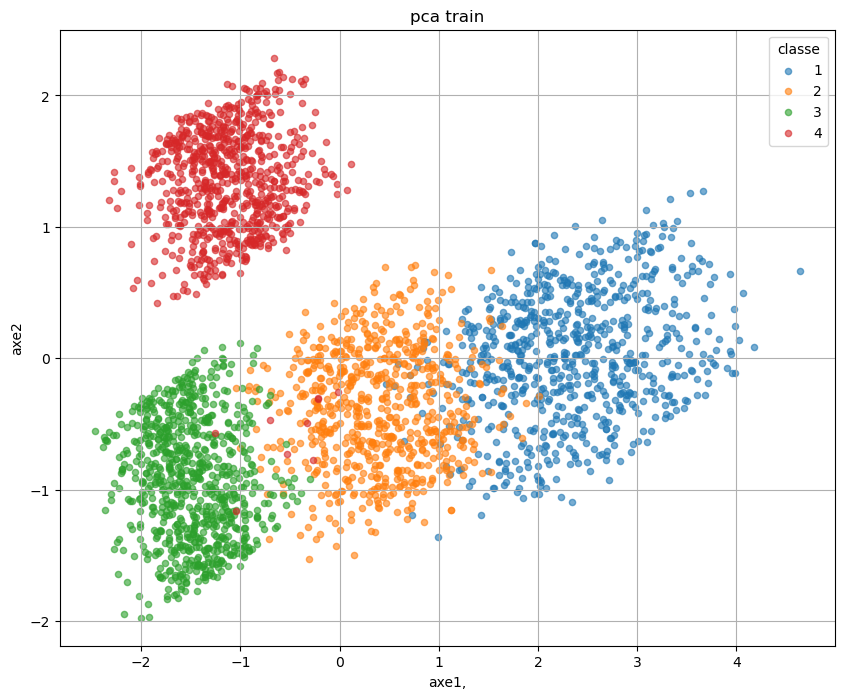

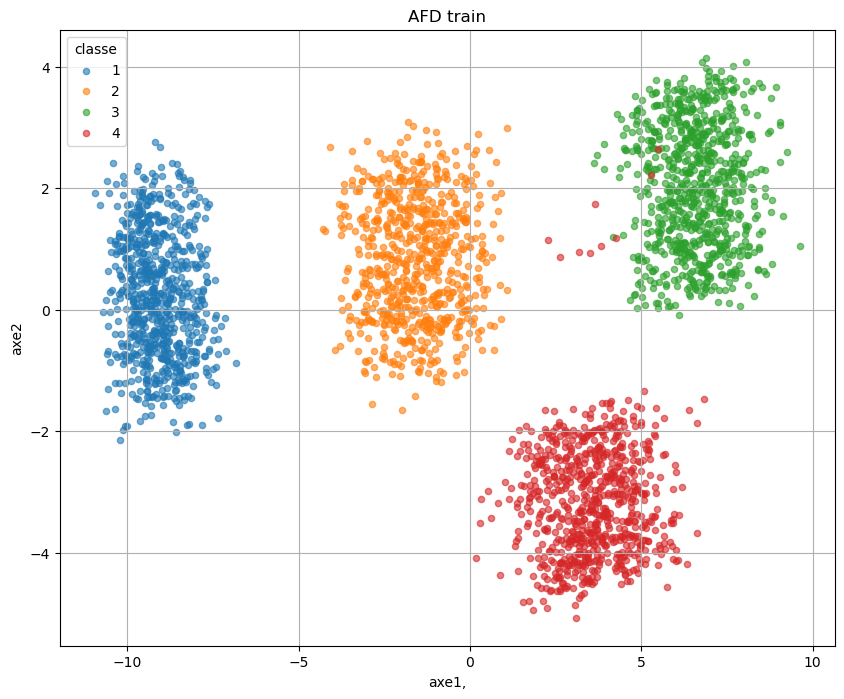


\ resultat de PCA2 

== MAP (PCA2) ==> Accuracy = 95.88%
matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):
 [[559  41   0   0]
 [ 28 562  10   0]
 [  0   8 592   0]
 [  0   6   6 588]]


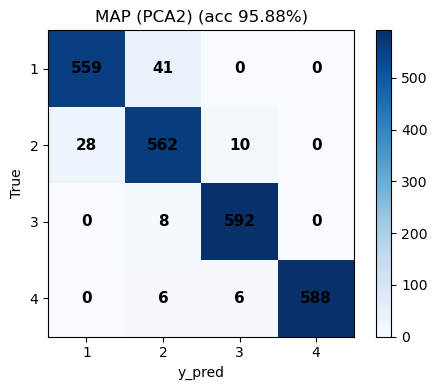

Cluster_classe map: {np.int32(3): np.int64(1), np.int32(0): np.int64(2), np.int32(1): np.int64(3), np.int32(2): np.int64(4)}

== k-means (PCA2) ==> Accuracy = 94.75%
matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):
 [[525  75   0   0]
 [ 10 564  26   0]
 [  0   3 597   0]
 [  0   4   8 588]]


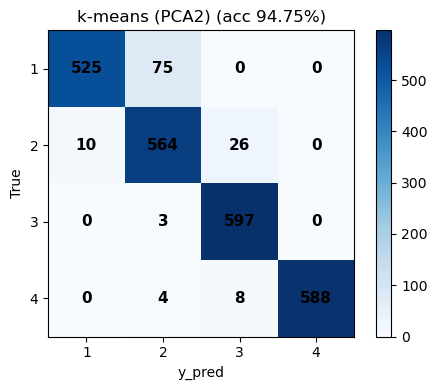


== k_voisin (k voisins les plus proches) (PCA2) ==> Accuracy = 95.92%
matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):
 [[564  36   0   0]
 [ 27 560  13   0]
 [  0  10 590   0]
 [  0   6   6 588]]


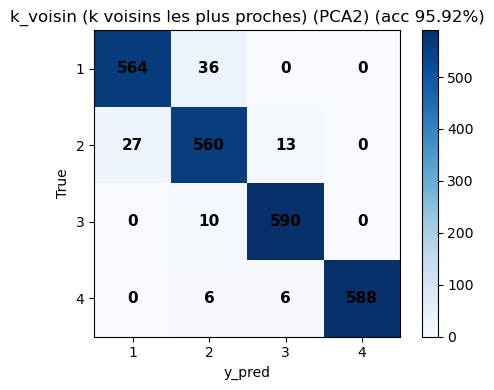


\ resultat de AFD2 

== MAP (AFD2) ==> Accuracy = 99.50%
matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):
 [[600   0   0   0]
 [  0 600   0   0]
 [  0   0 600   0]
 [  0   1  11 588]]


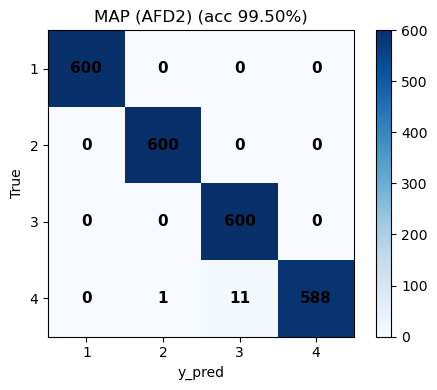

Cluster_classe map: {np.int32(1): np.int64(1), np.int32(3): np.int64(2), np.int32(0): np.int64(3), np.int32(2): np.int64(4)}

== k-means (AFD2) ==> Accuracy = 99.46%
matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):
 [[600   0   0   0]
 [  0 600   0   0]
 [  0   0 600   0]
 [  0   1  12 587]]


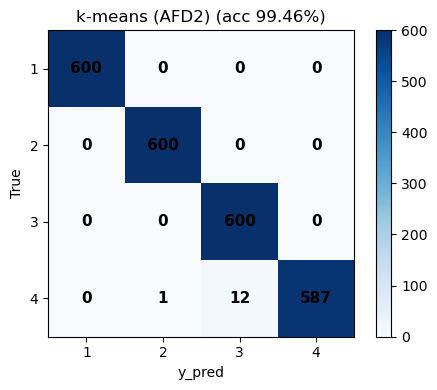


== k_voisin (k voisins les plus proches) (AFD2) ==> Accuracy = 99.50%
matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):
 [[600   0   0   0]
 [  0 600   0   0]
 [  0   0 597   3]
 [  0   0   9 591]]


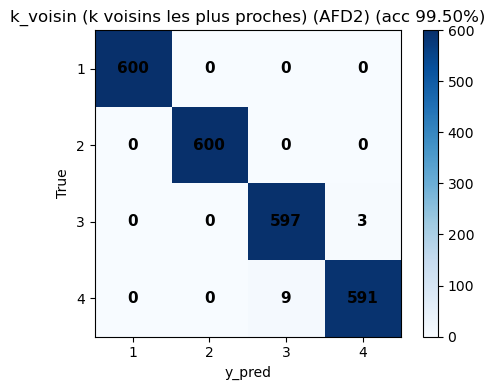

In [6]:
"""
@author: AWOUNANG
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import  KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix

# 
def lecture_des_fichiers(chemin_d_acces):
    print("\n\nLecture de la base  de donnees\n")
    MatriceDonnees=np.ndarray([], dtype=float)
    NoClasse=np.array([], dtype=int)
    
    source = open(chemin_d_acces, "r")
    
    NbrIndividus=0
    FinFichier=False
    while not FinFichier:
          ligne = source.readline().rstrip('\n\r')
          FinFichier = len(ligne)==0
          #print(ligne)
    
          if (not FinFichier) and (ligne[0:1]!="#"):
                 # Extraction des données de la ligne séparées par une virgule
                 donnees = ligne.rstrip('\n\r').split(",")
                 NbrVariables= len(donnees)-1
                 NbrIndividus+=1
    
                 Data=np.array([], dtype=float)
                 #print('/',donnees[0].strip(),'/')
                 NoClasse=np.append(NoClasse, [int(float(donnees[0].strip()))], axis=0)
                 Data=np.array(donnees[1:], dtype=float)
                 if NbrIndividus>2:
                     MatriceDonnees= np.append(MatriceDonnees, [Data], axis=0)
                 else:
                     if NbrIndividus==2:
                         MatriceDonnees= np.append([MatriceDonnees], [Data], axis=0)
                     else:
                         MatriceDonnees= Data
    
    # Fermerture du fichier source
    source.close()
    return MatriceDonnees,NoClasse.astype(dtype=int),NbrIndividus,NbrVariables
train_path='Donneesentrainement.txt'
test_path='Donneestest.txt'

x_train,y_train,NbrIndividus,NbrVariables=lecture_des_fichiers(train_path)
x_test,y_test,NbrIndividus,NbrVariables=lecture_des_fichiers(test_path)
def extraction_de_caracteristiques(signal,Fe=44100):
     #calcul de l'energie 
     energie=np.sum(signal**2)
     
     #determination de la frequence dominante 
     spec=np.abs(np.fft.rfft(signal))
     freqs=np.fft.rfftfreq(len(signal),d=1/Fe)
     index=np.argmax(spec)
     freq_dom=freqs[index];
     # calcul de la variance spectrale 
     spec_norm=spec/(spec.sum()+1e-16)
     spec_mean=np.sum(freqs*spec_norm)
     var_spec=np.sum(freqs-spec_mean)
     # DETERMINATION DE L'ENVELOPPE DE HILBERT
     Enveloppe = np.abs(hilbert(signal))
     moy_env=np.mean(Enveloppe)
     return np.array([energie,freq_dom,var_spec,moy_env])
 
param_train=np.vstack([extraction_de_caracteristiques(s,Fe=44100) for s in x_train])
param_test=np.vstack([extraction_de_caracteristiques(s,Fe=44100) for s in x_test])
 
    
#centrage de valeurS
Centrage=True
if Centrage:
    scaler=StandardScaler().fit(param_train)
    param_train_centrer=scaler.transform(param_train)
    param_test_centrer=scaler.transform(param_test)
else:
    param_train_centrer=param_train.copy()
    param_test_centrer=param_train.copy()

     
     


an_com_prin=PCA(n_components=2)
pca_train=an_com_prin.fit_transform(param_train_centrer,y_train)
pca_test=an_com_prin.transform(param_test_centrer)

AFD=LinearDiscriminantAnalysis(n_components=2)
AFD_train=AFD.fit_transform(param_train_centrer,y_train)
AFD_test=AFD.transform(param_test_centrer)

print('proportion de varaible explique par chaque composante',an_com_prin.explained_variance_ratio_)

def tracer_des_classes(X,y,titre=' projection dans le plan'):
    classe=np.unique(y)
    plt.figure(figsize=(10,8))
    for lab in classe:
        index=np.where(y==lab)[0]
        plt.scatter(X[index,0],X[index,1],label=str(lab),alpha=0.6,s=20)
        
    plt.legend(title="classe")    
    plt.xlabel("axe1,")
    plt.ylabel("axe2")
    plt.title(titre)
    plt.grid(True)
tracer_des_classes(pca_train, y_train,"pca train")
tracer_des_classes(AFD_train, y_train,"AFD train")
plt.show()



def imprimer_resultats(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))

    print(f"\n== {label} ==> Accuracy = {acc*100:.2f}%")
    print("matrice de confusion (ligne=vrai valeur, colonne=valeur predite r):\n", cm)

    plt.figure(figsize=(5,4))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.title(label + f" (acc {acc*100:.2f}%)")
    plt.colorbar()

    classes = np.unique(y_true)
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes)
    plt.yticks(ticks, classes)

    # Annotation de chaque cellule
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]),
                     ha='center', va='center',
                     color="black",
                     fontsize=11, fontweight='bold')

    plt.xlabel("y_pred")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    return acc, cm



def predict_MAP(X_train, y_train, X_test, reg=1e-6):
    classes = np.unique(y_train)
    n_features = X_train.shape[1]

    priors = {}
    means = {}
    invcovs = {}
    detcovs = {}

    
    for cl in classes:
        Xi = X_train[y_train == cl]
        priors[cl] = Xi.shape[0] / len(y_train)
        means[cl] = np.mean(Xi, axis=0)

        cov = np.cov(Xi, rowvar=False, bias=True)
        cov += reg * np.eye(n_features)  
        invcovs[cl] = np.linalg.inv(cov)
        detcovs[cl] = np.linalg.det(cov)

    
    ypred = np.zeros(len(X_test), dtype=classes.dtype)

    for i, x in enumerate(X_test):
        best_cl = None
        best_logpost = -np.inf

        for cl in classes:
            mu = means[cl]
            invC = invcovs[cl]
            detC = detcovs[cl]

            diff = (x - mu).reshape(-1, 1)

            loglike = -0.5 * (diff.T @ invC @ diff).item() - 0.5 * np.log(detC + 1e-16)
            logprior = np.log(priors[cl] + 1e-16)

            logpost = loglike + logprior

            if logpost > best_logpost:
                best_logpost = logpost
                best_cl = cl

        ypred[i] = best_cl

    return ypred

def predict_avec_kmeans(x_train,y_train,x_test,n_cluster=None, seed=0):
    if n_cluster is None:
        n_cluster = len(np.unique(y_train))

    k_Mean= KMeans(n_clusters=n_cluster, random_state=seed, n_init=10).fit(x_train)
    label_cluster=k_Mean.labels_
    cluster_class={}
    for lab in label_cluster:
        indice=np.where(label_cluster==lab)[0]
        label,occurence=np.unique(y_train[indice],return_counts=True)
        cluster_class[lab]=label[np.argmax(occurence)]
        label_test=k_Mean.predict(x_test)
        classe_defaut = np.bincount(y_train).argmax()
        y_pred = np.array([cluster_class.get(c, classe_defaut) for c in label_test])

    return y_pred,cluster_class,k_Mean
         
def classification_voisin_proches(x_train,y_train,x_test,nbr_voisin=1):
    model=KNeighborsClassifier(n_neighbors=nbr_voisin)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    return y_pred,model
#def separateur_a_vaste_marge(x_train,y_train,y_test):
        

Variables_caracteristique= {
"PCA2": (pca_train, pca_test),
"AFD2": (AFD_train, AFD_test)
}

results = {}

for Variables_caracteristique, (Xtr, Xte) in Variables_caracteristique.items():
    print("\n\ resultat de {} ".format(Variables_caracteristique))
    results[Variables_caracteristique] = {}

    ypred_map = predict_MAP(Xtr, y_train, Xte)
    acc_map, cm_map = imprimer_resultats(y_test, ypred_map, f"MAP ({Variables_caracteristique})")
    results[Variables_caracteristique]['MAP'] = acc_map
    
    ypred_km,clmap, km_model= predict_avec_kmeans(Xtr, y_train, Xte,n_cluster=None)
    print("Cluster_classe map:", clmap)
    acc_km, cm_km = imprimer_resultats(y_test, ypred_km, f"k-means ({Variables_caracteristique})")
    results[Variables_caracteristique]['kmeans'] = acc_km

    ypred_knn, knn_model = classification_voisin_proches(Xtr, y_train, Xte, nbr_voisin=5)
    acc_knn, cm_knn = imprimer_resultats(y_test, ypred_knn, f"k_voisin (k voisins les plus proches) ({Variables_caracteristique})")
    results[Variables_caracteristique]['knn'] = acc_knn
    